# Réseaux plans et Polyèdres

In [1]:
import ccad.model as cm 
import ccad.planarnet as pn
import reversy.pointcloud as pc
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from OCC.Display.WebGl import jupyter_renderer
%matplotlib inline

SMESH wrapper not found, can't display SMESH meshes


Le module **planarnet** est une extension de **ccad.model** destinée à faciliter la construction des polyèdres à partir de leur représentation par [un réseau plan](http://mathworld.wolfram.com/Net.html) .
*La [conjecture de Shephard](http://mathworld.wolfram.com/ShephardsConjecture.html)
suggère que tout polyhèdre convexe admet un telle représentation plane sans recouvrement*.  


Le module **planarnet** permet de paver le plan avec des polygones, et de maintenir un graphe associé dont les noeuds sont les faces du polyèdre et les arètes des connexions entre faces auxquelles sont associées une valeur angulaire de pliage :  **angle**. 


Ce notebook illustre comment cette classe permet de générer des polygones réguliers en peu d'instructions et en indiquant le procédé de construction sous-jacent. En ce sens, il est l'analogue de ce que l'on souhaite réaliser dans [**osvcad**](https://github.com/osv-team/osvcad) à un niveau supérieur avec des **graphes de solides et d'assemblages** constituant un assemblage. 

![BRUCKNER1900](http://seeingscience.umbc.edu/wp-content/uploads/2017/01/BRUCKNER-2.jpg)

# Le tétraèdre

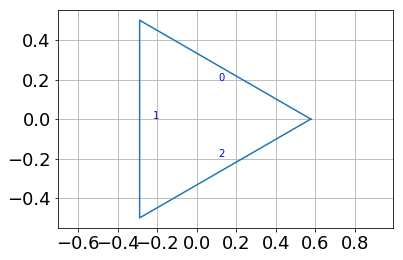

In [2]:
tetranet = pn.PlanarNet(N=3,l=1)
tetranet.plot()   

In [3]:
alpha = 2.185
tetranet.expand(0,0,4,sign=1,angle=alpha)

On réplique ensuite la forme du triangle équilatéral sur chaque arète du triangle 0 à l'aide de la méthode tile. 

On affecte à chaque arète la valeur angulaire qui permettra le pliage en 3 dimensions associé au numéro de l'arête.

In [4]:
tetranet.node

{0: {'normal': array([ 0.,  0.,  1.])}, 1: {'normal': array([ 0., -0.,  1.])}}

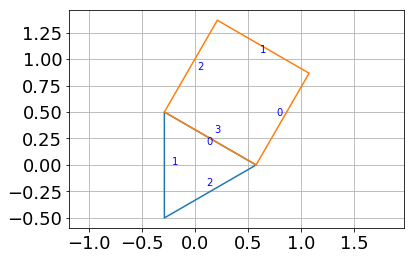

In [5]:
tetranet.plot()   

In [6]:
tetranet.expand(1,0,3,angle=alpha)
tetranet.expand(1,1,3,angle=alpha)
tetranet.expand(1,2,3,angle=alpha)

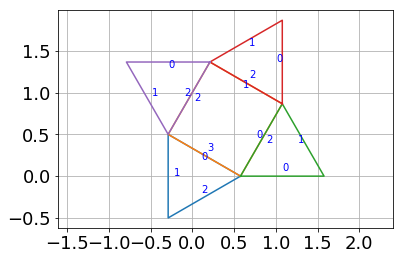

In [7]:
tetranet.plot()

In [8]:
tetranet.lfaces

[Area : 0.433   Center : -0.000, 0.000 , 0.000,
 Area : 1.000   Center : 0.394, 0.683 , 0.000,
 Area : 0.433   Center : 1.077, 0.289 , 0.000,
 Area : 0.433   Center : 0.789, 1.366 , 0.000,
 Area : 0.433   Center : -0.289, 1.077 , 0.000]

In [9]:
tetrasolid = tetranet.fold()

V 8
E 12
F 5
Euler check (2): V-E+F : 1
open shape


In [10]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(tetrasolid.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -2.002294713211703, -1.2258489531153678), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -2.002294713211703, -1.2258489531153678), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(0.00026058708794857166, -0.00045094264234069037, -0.4086163177051226)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(18, 3), dtype=float32>, 'normal': <BufferAttribute shape=(18, 3), dtype=float32>, 'index': BufferAttribute(array=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=uint32))}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'5750107e1bf84b48bc7af57e97709649', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(18, 3), dtype=float32>, 'normal': <BufferAttribute shape=(18, 3), dtype=float32>, 'index': BufferAttribute(array=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=uint32))}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'5750107e1bf84b48bc7af57e97709649', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), Group(quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -2.002294713211703, -1.2258489531153678), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), AmbientLight(color=u'#101010', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0))), fog=None, overrideMaterial=None, quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), shadowMap=WebGLShadowMap()), HTML(value=u'Selected shape : None')))

In [11]:
tetranet = pn.PlanarNet(N=3,l=1)
alpha = np.pi - np.arccos(1/3.)
#alpha = np.pi/20
for k in range(3):
    tetranet.replicate(iedge=k, angle = alpha)

In [12]:
type(tetranet.lfaces[0])

ccad.model.Face

In [13]:
tetranet.edge

{0: {1: {'angle': 1.9106332362490184, 'iedge': 0},
  2: {'angle': 1.9106332362490184, 'iedge': 1},
  3: {'angle': 1.9106332362490184, 'iedge': 2}},
 1: {0: {'angle': 1.9106332362490184, 'iedge': 0}},
 2: {0: {'angle': 1.9106332362490184, 'iedge': 1}},
 3: {0: {'angle': 1.9106332362490184, 'iedge': 2}}}

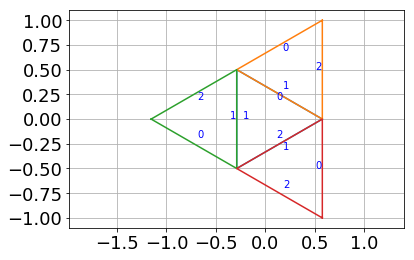

In [14]:
tetranet.plot()

In [15]:
tetrasolid = tetranet.fold()

V 4
E 6
F 4
Euler check (2): V-E+F : 2
closed shape


In [16]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(tetrasolid.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -2.0000399999999994, -1.2247448713915887), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -2.0000399999999994, -1.2247448713915887), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(0.14433756729740613, 2.220446049250313e-16, -0.4082482904638629)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': BufferAttribute(array=array([[  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16]], dtype=float32)), 'normal': BufferAttribute(array=array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  4.71404523e-01,   8.16496611e-01,  -3.33333343e-01],
       [  4.71404523e-01,   8.16496611e-01,  -3.33333343e-01],
       [  4.71404523e-01,   8.16496611e-01,  -3.33333343e-01],
       [ -9.42809045e-01,   4.88819590e-16,  -3.33333343e-01],
       [ -9.42809045e-01,   4.88819590e-16,  -3.33333343e-01],
       [ -9.42809045e-01,   4.88819590e-16,  -3.33333343e-01],
       [  4.71404523e-01,  -8.16496611e-01,  -3.33333343e-01],
       [  4.71404523e-01,  -8.16496611e-01,  -3.33333343e-01],
       [  4.71404523e-01,  -8.16496611e-01,  -3.33333343e-01]], dtype=float32)), 'index': BufferAttribute(array=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint32))}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'91e8cabe7eee456395d78b308a10f9c7', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': BufferAttribute(array=array([[  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16]], dtype=float32)), 'normal': 

# [Le dodécaèdre](http://mathworld.wolfram.com/Unfolding.html)

In [17]:
dodecanet = pn.PlanarNet(N=5,l=1)
alpha = np.arctan(2)
for k in range(5):
    dodecanet.replicate(iedge=k, angle = alpha)
dodecanet.replicate(iface=1,iedge=3,angle=alpha)
dodecanet.replicate(iface=6,iedge=1,angle=alpha)
for k in range(2,6):
    dodecanet.replicate(iface=7,iedge=(k+1)%5,angle=alpha)
dodecasolid = dodecanet.fold()

V 20
E 30
F 12
Euler check (2): V-E+F : 2
closed shape


In [18]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(dodecasolid.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.236107977499793, -3.340549093234821), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.236107977499793, -3.340549093234821), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(1.1102230246251565e-16, -2.220446049250313e-16, -1.113516364411607)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(108, 3), dtype=float32>, 'normal': <BufferAttribute shape=(108, 3), dtype=float32>, 'index': <BufferAttribute shape=(108,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'47e581a55c3d491b9e169c8f8af8c59b', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(108, 3), dtype=float32>, 'normal': <BufferAttribute shape=(108, 3), dtype=float32>, 'index': <BufferAttribute shape=(108,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'47e581a55c3d491b9e169c8f8af8c59b', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), Group(quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.236107977499793, -3.340549093234821), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), AmbientLight(color=u'#101010', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0))), fog=None, overrideMaterial=None, quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), shadowMap=WebGLShadowMap()), HTML(value=u'Selected shape : None')))

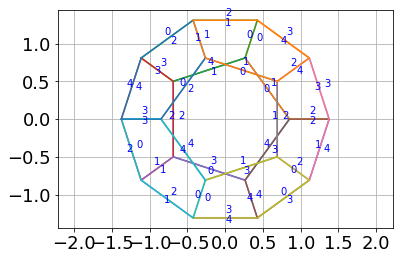

In [19]:
dodecanet.plot()

In [20]:
dodecanet

PlanarNet :12
Folded
Area : 1.720   Center : -0.000, -0.000 , 0.000
Area : 1.720   Center : 0.806, 0.585 , -0.616
Area : 1.720   Center : -0.308, 0.947 , -0.616
Area : 1.720   Center : -0.996, 0.000 , -0.616
Area : 1.720   Center : -0.308, -0.947 , -0.616
Area : 1.720   Center : 0.806, -0.585 , -0.616
Area : 1.720   Center : 0.996, -0.000 , -1.611
Area : 1.720   Center : 0.000, -0.000 , -2.227
Area : 1.720   Center : 0.308, -0.947 , -1.611
Area : 1.720   Center : -0.806, -0.585 , -1.611
Area : 1.720   Center : -0.806, 0.585 , -1.611
Area : 1.720   Center : 0.308, 0.947 , -1.611

Il est possible de déplier le réseau plan 

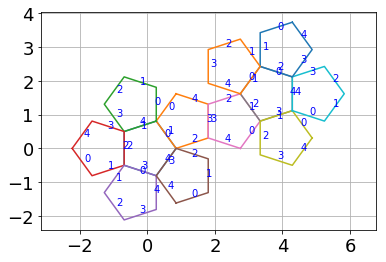

In [20]:
dodecanet.fold(reverse=True)
dodecanet.plot()

# L'icosaèdre

Voici une construction naive de l'icosahèdre ou l'on explicite chaque duplication de triangle équilatéral.

In [21]:
icosanet = pn.PlanarNet(N=3,l=1)
alpha = np.pi-np.arccos(-np.sqrt(5)/3)
icosanet.replicate(iedge=2, angle = alpha)
icosanet.replicate(iface=1,iedge=0, angle = alpha)
icosanet.replicate(iface=0,iedge=1, angle = alpha)
icosanet.replicate(iface=1,iedge=2, angle = alpha)
icosanet.replicate(iface=4,iedge=1, angle = alpha)
icosanet.replicate(iface=4,iedge=2, angle = alpha)
icosanet.replicate(iface=6,iedge=0, angle = alpha)
icosanet.replicate(iface=6,iedge=2, angle = alpha)
icosanet.replicate(iface=8,iedge=1, angle = alpha)
icosanet.replicate(iface=8,iedge=2, angle = alpha)
icosanet.replicate(iface=10,iedge=0, angle = alpha)
icosanet.replicate(iface=10,iedge=2, angle = alpha)
icosanet.replicate(iface=12,iedge=1, angle = alpha)
icosanet.replicate(iface=12,iedge=2, angle = alpha)
icosanet.replicate(iface=14,iedge=0, angle = alpha)
icosanet.replicate(iface=14,iedge=2, angle = alpha)
icosanet.replicate(iface=16,iedge=1, angle = alpha)
icosanet.replicate(iface=16,iedge=2, angle = alpha)
icosanet.replicate(iface=18,iedge=0, angle = alpha)

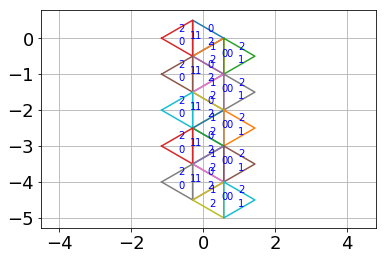

In [22]:
icosanet.plot()

In [23]:
s = icosanet.fold()

V 12
E 30
F 20
Euler check (2): V-E+F : 2
closed shape


In [24]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(s.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -3.2361079774997927, -2.267283942228511), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -3.2361079774997927, -2.267283942228511), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(1.6653345369377348e-16, 8.326672684688674e-16, -0.7557613140761704)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(60, 3), dtype=float32>, 'normal': <BufferAttribute shape=(60, 3), dtype=float32>, 'index': <BufferAttribute shape=(60,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'f0a2d1e7f58645799eabe170beae8a91', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(60, 3), dtype=float32>, 'normal': <BufferAttribute shape=(60, 3), dtype=float32>, 'index': <BufferAttribute shape=(60,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'f0a2d1e7f58645799eabe170beae8a91', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), Group(quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -3.2361079774997927, -2.267283942228511), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), AmbientLight(color=u'#101010', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0))), fog=None, overrideMaterial=None, quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), shadowMap=WebGLShadowMap()), HTML(value=u'Selected shape : None')))

# [Le Ballon de foot](https://en.wikipedia.org/wiki/Truncated_icosahedron)

Nous allons utiliser planarnet pour construire un ballon de football et pour réaliser sa représentation 3D avec ccad.

On commence par créer un PlanarNet basé sur un hexagone (N=6) et de côté unitaire l=1

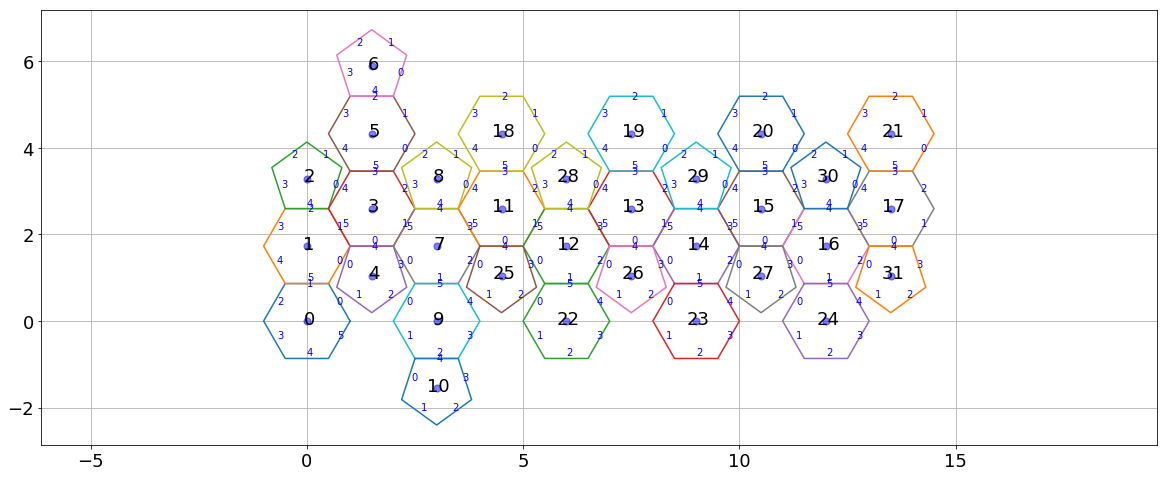

In [27]:
plt.figure(figsize=(20,8))
alpha=(180-138.189685)*np.pi/180.
beta=(180-142.62)*np.pi/180.
ball = pn.PlanarNet(N=6,l=1)
ball.expand(0,1,6,angle=alpha)
ball.expand(1,2,5,angle=beta)
ball.expand(1,1,6,angle=alpha)
ball.expand(3,0,5,angle=beta)
ball.expand(3,3,6,angle=alpha)
ball.expand(5,2,5,angle=beta)
ball.expand(3,1,6,angle=alpha)
ball.expand(7,4,5,angle=beta)
ball.expand(7,1,6,angle=alpha)
ball.expand(9,2,5,angle=beta)
ball.expand(7,3,6,angle=alpha)
ball.expand(11,1,6,angle=alpha)
ball.expand(12,3,6,angle=alpha)
ball.expand(13,1,6,angle=alpha)
ball.expand(14,3,6,angle=alpha)
ball.expand(15,1,6,angle=alpha)
ball.expand(16,3,6,angle=alpha)
ball.expand(11,3,6,angle=alpha)
ball.expand(13,3,6,angle=alpha)
ball.expand(15,3,6,angle=alpha)
ball.expand(17,3,6,angle=alpha)
ball.expand(12,1,6,angle=alpha)
ball.expand(14,1,6,angle=alpha)
ball.expand(16,1,6,angle=alpha)
ball.expand(11,0,5,angle=beta)
ball.expand(13,0,5,angle=beta)
ball.expand(15,0,5,angle=beta)
ball.expand(12,4,5,angle=beta)
ball.expand(14,4,5,angle=beta)
ball.expand(16,4,5,angle=beta)
ball.expand(17,0,5,angle=beta)
ball.plot(bnodes=1,blabels=1)

In [28]:
asolid = ball.fold()

V 96
E 138
F 32
Euler check (2): V-E+F : -10
open shape


In [29]:
asolid.fix(min_tolerance=1e-1)

In [30]:
ball.edges()

[(0, 1),
 (1, 2),
 (1, 3),
 (3, 4),
 (3, 5),
 (3, 7),
 (5, 6),
 (7, 8),
 (7, 9),
 (7, 11),
 (9, 10),
 (11, 25),
 (11, 18),
 (11, 12),
 (12, 28),
 (12, 13),
 (12, 22),
 (13, 26),
 (13, 19),
 (13, 14),
 (14, 23),
 (14, 29),
 (14, 15),
 (15, 16),
 (15, 27),
 (15, 20),
 (16, 24),
 (16, 17),
 (16, 30),
 (17, 21),
 (17, 31)]

In [31]:
vertices = asolid.subshapes('Vertex')

In [32]:
len(vertices)

96

In [33]:
p1 = pc.PointCloud()

In [34]:
p1 = p1.from_solid(asolid)

In [35]:
p1

PointCloud : 96 points

In [36]:
p1.sorting()

In [37]:
p1.ordering()

In [38]:
asolid=cm.translated(asolid,-np.array(asolid.center()))

TypeError: 

In [39]:
asolid.center()

(-1.269164327597371e-09, 2.3936547584099757e-09, -2.2672839342136175)

In [40]:
p1 = pc.PointCloud()
p1 = p1.from_solid(asolid)

In [42]:
p1

PointCloud : 96 points

(<matplotlib.figure.Figure at 0x7fc99da9dfd0>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fc99ddd9f90>)

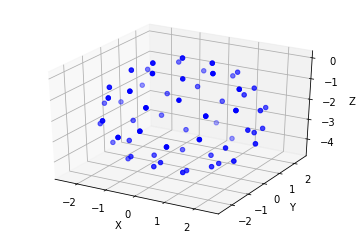

In [41]:
p1.show()

In [98]:
p1.ordering()

In [101]:
p1.sorting()

In [102]:
p1.p

array([[ -2.42705098e+00,  -4.67086159e-01,   1.78411061e-01],
       [ -2.42705097e+00,   4.67086199e-01,  -1.78411031e-01],
       [ -2.11803400e+00,  -1.22284748e+00,  -3.98939208e-01],
       [ -2.11803398e+00,   6.45497239e-01,  -1.11258339e+00],
       [ -2.11803398e+00,  -6.45497205e-01,   1.11258342e+00],
       [ -2.11803397e+00,   1.22284751e+00,   3.98939234e-01],
       [ -2.11799682e+00,   6.45475783e-01,  -1.11257520e+00],
       [ -2.11799682e+00,  -6.45475749e-01,   1.11257522e+00],
       [ -1.80901700e+00,  -1.04443644e+00,  -1.33311157e+00],
       [ -1.80901700e+00,  -1.10264079e-01,  -1.68993366e+00],
       [ -1.80901697e+00,   1.10264107e-01,   1.68993368e+00],
       [ -1.80901697e+00,   1.04443647e+00,   1.33311159e+00],
       [ -1.80899403e+00,  -1.10250820e-01,  -1.68989895e+00],
       [ -1.80899401e+00,   1.10250848e-01,   1.68989897e+00],
       [ -1.61803400e+00,  -1.86834470e+00,   1.78411060e-01],
       [ -1.61803399e+00,  -1.51152261e+00,   1.1125834

In [99]:
p1.dist

array([ 2.47795226,  2.47795226,  2.47795226,  2.47795226,  2.47795226,
        2.47795226,  2.47795226,  2.47795227,  2.47795227,  2.47795227,
        2.47795227,  2.47795227,  2.47797762,  2.47797762,  2.47797762,
        2.47797762,  2.47797762,  2.47797762,  2.47797762,  2.47797762,
        2.47797762,  2.47797762,  2.47797762,  2.47797762,  2.47797762,
        2.47797762,  2.47797762,  2.47797762,  2.47797762,  2.47797762,
        2.47797763,  2.47797763,  2.47797763,  2.47797763,  2.47797763,
        2.47797763,  2.47801865,  2.47801865,  2.47801865,  2.47801865,
        2.47801865,  2.47801865,  2.47801865,  2.47801865,  2.47801865,
        2.47801865,  2.47801865,  2.47801865,  2.47801865,  2.47801865,
        2.47801865,  2.47801865,  2.47801865,  2.47801865,  2.47801865,
        2.47801865,  2.47801865,  2.47801865,  2.47801865,  2.47801865,
        2.47801865,  2.47801865,  2.47801865,  2.47801865,  2.47801865,
        2.47801865,  2.47801865,  2.47801865,  2.47801865,  2.47

In [43]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(ball.shell.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -9.78281992016324, -6.80185180812661), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -9.78281992016324, -6.80185180812661), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(-1.0168552666556252e-09, 1.3322676295501878e-15, -2.2672839360422032)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(348, 3), dtype=float32>, 'normal': <BufferAttribute shape=(348, 3), dtype=float32>, 'index': <BufferAttribute shape=(348,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'ad28344f01a24b9ca3c3e2c685cd7042', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(348, 3), dtype=float32>, 'normal': <BufferAttribute shape=(348, 3), dtype=float32>, 'index': <BufferAttribute shape=(348,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'ad28344f01a24b9ca3c3e2c685cd7042', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), Group(quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -9.78281992016324, -6.80185180812661), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), AmbientLight(color=u'#101010', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0))), fog=None, overrideMaterial=None, quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), shadowMap=WebGLShadowMap()), HTML(value=u'Selected shape : None')))

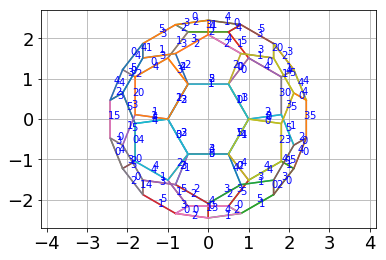

In [31]:
ball.plot(bnodes=0,blabels=0)

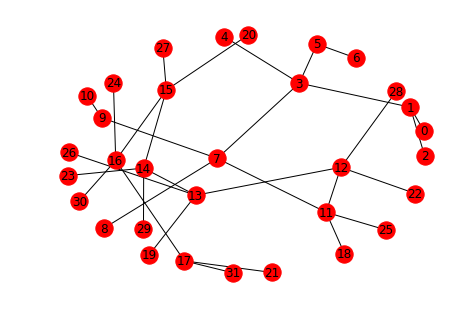

In [174]:
import networkx as nx
pos=nx.spring_layout(ball)
nx.draw(ball,pos)
lb=nx.draw_networkx_labels(ball,pos=pos)